In [5]:
import pickle
import numpy as np
from scipy import sparse


def cholesky(matrix):
    i_dim, _ = np.shape(matrix)
    g_arr = np.zeros_like(matrix)
    g_arr[0, 0] = matrix[0, 0] ** (1/2)
    g_arr[1:, 0] = matrix[1:, 0] / matrix[0, 0] ** (1/2)
    for i in range(1, i_dim):
        g_arr[i, i] = (matrix[i, i] - np.sum(g_arr[i, 0:i]**2)) ** (1/2)
        g_arr[i+1:, i] = (matrix[i+1:, i] - np.sum(g_arr[i+1:, 0:i] * g_arr[i, 0:i], axis=1)) / g_arr[i, i]
    return g_arr



def a_func(n, m, dim_m=2):
    if n == m:
        ret = 4
    elif abs(n - m) == abs(dim_m) or (abs(n - m) == 1 and not (n+m+1) % (2*dim_m) == 0):
        ret = -1
    else:
        ret = 0

    return np.float64(ret)

print('a_func', len(pickle.dumps(a_func)), '\\')

a_func = np.vectorize(a_func)

for dim in range(2, 21):
    print("dim = %i" % dim, '\\')
    a_dens = a_func(*np.ogrid[0:dim ** 2, 0:dim ** 2], dim_m=dim)
    a_diag = sparse.dia_matrix(a_dens)
    a_coor = sparse.coo_matrix(a_dens)
    print('a_dens ', len(pickle.dumps(a_dens)), '\\')
    g_dens = cholesky(a_dens)
    g_diag = sparse.dia_matrix(g_dens)
    g_coor = sparse.coo_matrix(g_dens)
    print('a_diag g_diag', len(pickle.dumps(a_diag)), len(pickle.dumps(g_diag)), '\\')
    print('a_cood g_cood', len(pickle.dumps(a_coor)), len(pickle.dumps(g_coor)), '\\')
    norm = np.linalg.norm(a_dens - g_dens @ g_dens.T, ord=1)
    print("norm=", norm, '\\')


a_func 34 \
dim = 2 \
a_dens  277 \
a_diag g_diag 481 409 \
a_cood g_cood 547 499 \
norm= 9.992007221626409e-16 \
dim = 3 \
a_dens  800 \
a_diag g_diag 684 608 \
a_cood g_cood 886 819 \
norm= 4.440892098500626e-16 \
dim = 4 \
a_dens  2200 \
a_diag g_diag 964 964 \
a_cood g_cood 1388 1436 \
norm= 1.2355567957644809e-15 \
dim = 5 \
a_dens  5152 \
a_diag g_diag 1324 1528 \
a_cood g_cood 2044 2428 \
norm= 9.998512434661322e-16 \
dim = 6 \
a_dens  10520 \
a_diag g_diag 1764 2348 \
a_cood g_cood 2860 3900 \
norm= 1.2449499245921886e-15 \
dim = 7 \
a_dens  19360 \
a_diag g_diag 2284 3472 \
a_cood g_cood 3836 5951 \
norm= 1.2798491715644917e-15 \
dim = 8 \
a_dens  32920 \
a_diag g_diag 2884 4948 \
a_cood g_cood 4975 8671 \
norm= 1.1565395065487128e-15 \
dim = 9 \
a_dens  52640 \
a_diag g_diag 3564 6824 \
a_cood g_cood 6271 12159 \
norm= 1.3526478118932831e-15 \
dim = 10 \
a_dens  80161 \
a_diag g_diag 4324 9148 \
a_cood g_cood 7727 16511 \
norm= 1.2483996457815775e-15 \
dim = 11 \
a_dens  1172

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3877787807814457e-17, 2.7755575615628914e-17, 3.469446951953614e-17, 5.551115123125783e-17, 5.551115123125783e-17, 6.938893903907228e-17, nan, nan, nan, nan, nan, nan, nan]


C:\Users\finnd\AppData\Local\Temp\ipykernel_10944\3487262445.py:12: RuntimeWarning: invalid value encountered in scalar power
  g_arr[i, i] = (matrix[i, i] - np.sum(g_arr[i, 0:i]**2)) ** (1/2)


[Text(0.5, 0, 'n'), Text(0, 0.5, 'Fehler')]

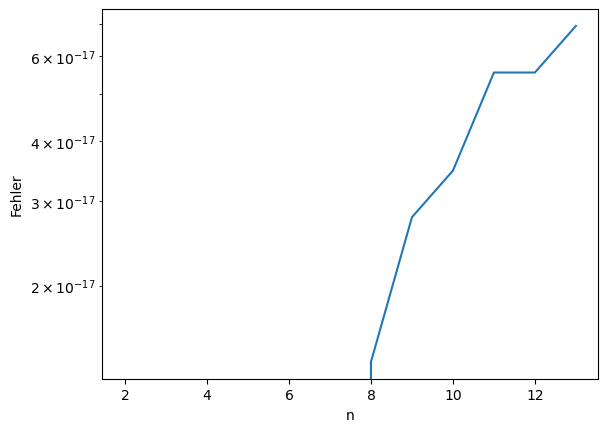

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def h_func(n, m, dim_m=2):
    return 1 / np.float64(n + m + 1)

h_func = np.vectorize(h_func)

dim_list = [*range(2,21)]
norm_list = []

for dim in dim_list:
    h_dens = h_func(*np.ogrid[0:dim, 0:dim])
    g_dens = cholesky(h_dens)
    norm_list.append(np.linalg.norm(h_dens - g_dens @ g_dens.T, ord=1))
    
print(norm_list)
fig, ax = plt.subplots()
ax.semilogy(dim_list, norm_list)
ax.set(xlabel='n', ylabel='Fehler')
